In [1]:
import sys, os
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.patches as patch
import cartopy.crs as ccrs

from typing import NamedTuple

from scipy.stats import pearsonr
from functools import partial

import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.path.join(os.getcwd(), 'Documents', 'PhD'))

import constants
sys.path.append(constants.MODULE_DIR)
import signal_to_noise as sn
import stats
import classes

In [2]:
ROOT_DIR = os.path.join(constants.LONGRUNMIP_DIR, 'tas', 'regrid_retimestamped')
ROOT_DIR

'/g/data/w40/ab2313/PhD/longrunmip/tas/regrid_retimestamped'

In [3]:
open_kwargs = dict(use_cftime=True)

In [9]:
abrupt_ds = xr.open_dataset(os.path.join(ROOT_DIR ,'tas_mon_CESM104_abrupt4x_5900_g025.nc'), 
                           **open_kwargs).isel(time=slice(None, 1000)).tas.compute()

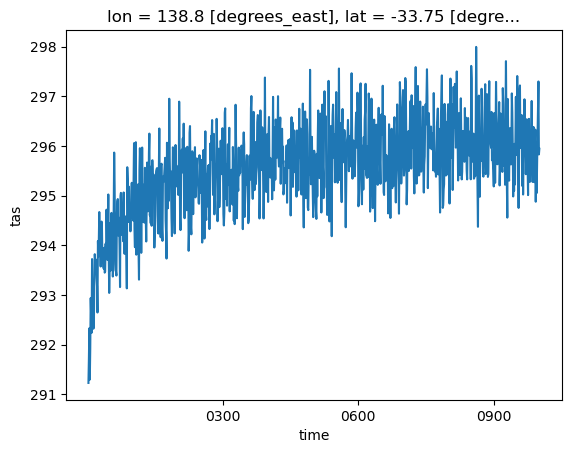

In [12]:
sp_da = abrupt_ds.sel(lat=-35, lon=139, method='nearest')
sp_da.plot()

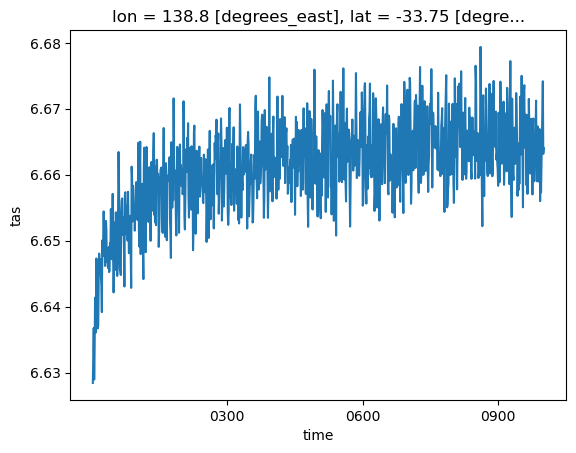

In [15]:
sp_da_scaled = sp_da**(1/3)
sp_da_scaled.plot()

In [32]:
sp_da_scaled_trend_fit = stats.trend_fit(sp_da_scaled, method='polynomial', order=8)

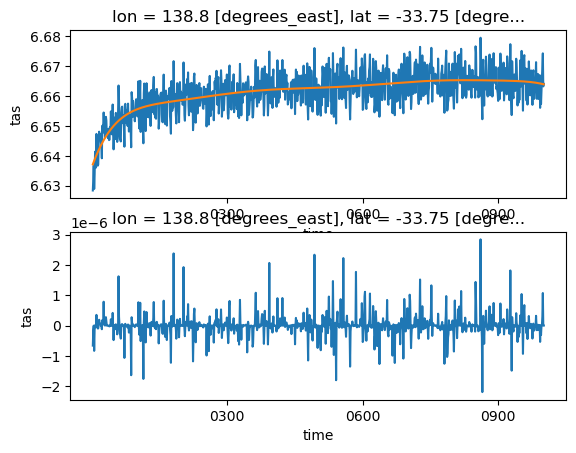

In [35]:
fig, axes = plt.subplots(nrows=2)
axes = axes.ravel()
sp_da_scaled.plot(ax=axes[0])
sp_da_scaled_trend_fit.plot(ax=axes[0])
((sp_da_scaled-sp_da_scaled_trend_fit)**3).plot(ax=axes[1])

In [42]:
dir(classes.locationsLatLon2)

['ANTARCTIC',
 'ARCTIC',
 'EASTERN_PACIFIC',
 'NORTHERN_EUROPE',
 'SOLOMON_ISLANDS',
 '__class__',
 '__doc__',
 '__members__',
 '__module__']

In [53]:
loclatlon.value

(60.08, 36.32)

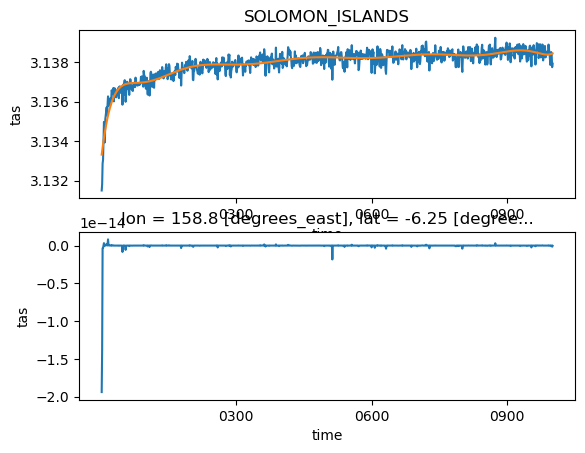

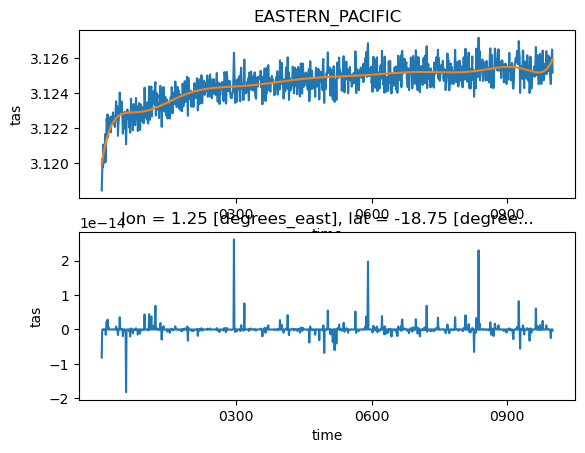

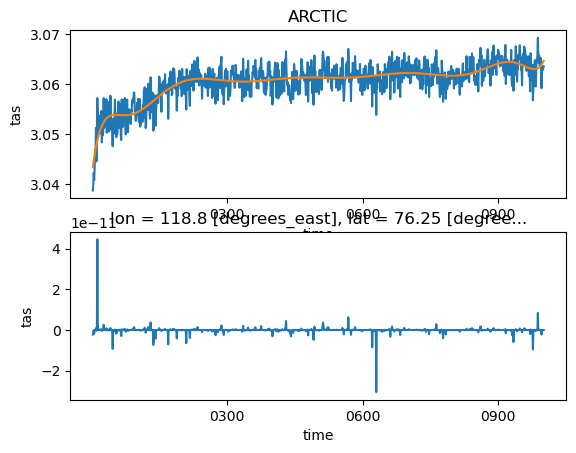

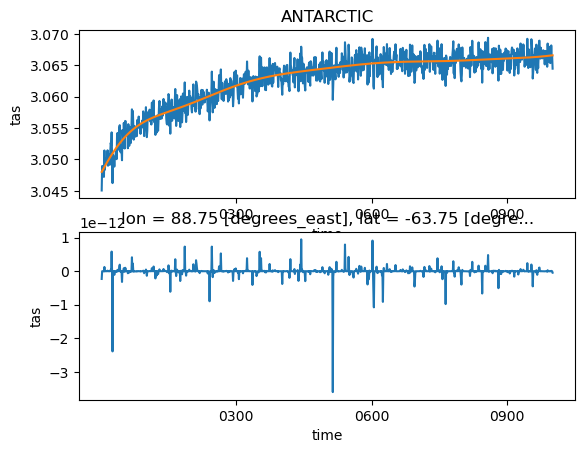

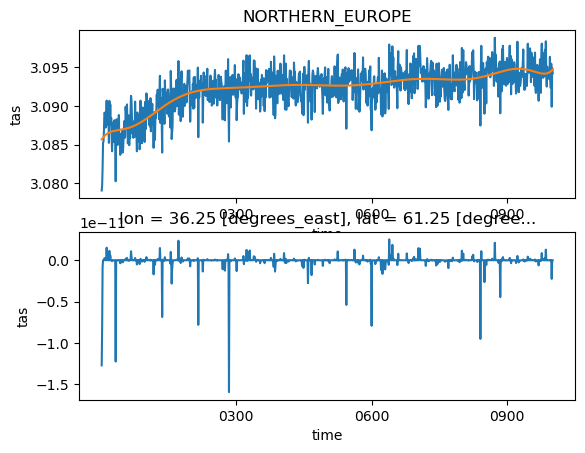

In [65]:
transform_factor = 5

for loclatlon in classes.locationsLatLon2:
    fig, axes = plt.subplots(nrows=2)
    axes = axes.ravel()

    sp_da = abrupt_ds.sel(lat=loclatlon.value[0], lon=loclatlon.value[1], method='nearest')
    sp_da_scaled = sp_da ** (1/transform_factor)
    sp_da_scaled_trend_fit = stats.trend_fit(sp_da_scaled, method='polynomial', order=11)
    
    sp_da_scaled.plot(ax=axes[0])
    sp_da_scaled_trend_fit.plot(ax=axes[0])
    ((sp_da_scaled-sp_da_scaled_trend_fit)**transform_factor).plot(ax=axes[1])
    axes[0].set_title(loclatlon.name)